In [2]:
import io

import pandas as pd
import plotly.express as px

# 棒グラフと棒の並べ替え

３種の動物の体重についてのデータセット

棒の順序はデフォルトでは、与えられた順序 (Cat, Capybara, Wombat) の順。

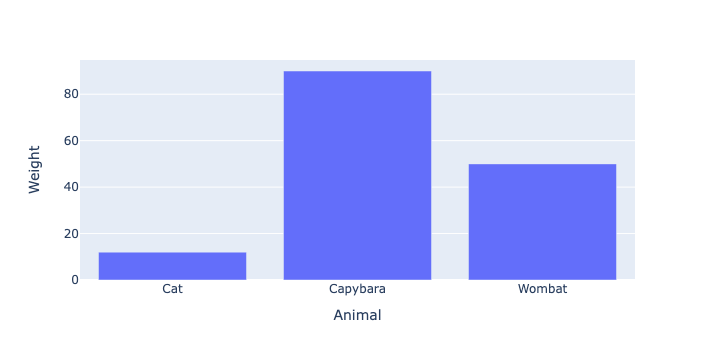

In [16]:
AnimalWeights = {'Animal': ['Cat', 'Capybara', 'Wombat'],
                 'Weight': [12, 90, 50]}
px.bar(pd.DataFrame(AnimalWeights), x='Animal', y='Weight')

動物名のアルファベット順に並べかえるには `.update_layout(xaxis={'categoryorder': 'category ascending'})`。

In [17]:
px.bar(pd.DataFrame(AnimalWeights), x='Animal', y='Weight').update_layout(xaxis={'categoryorder': 'category ascending'})

体重順に並べかえるには `.update_layout(xaxis={'categoryorder': 'total ascending'})`

In [21]:
px.bar(pd.DataFrame(AnimalWeights), x='Animal', y='Weight').update_layout(xaxis={'categoryorder': 'total ascending'})

In [68]:
# 積み上げ棒グラフ

SPI_ALL = pd.read_excel('data/SPI2011-2023.xlsx', sheet_name=None, skiprows=2)['Data 2011-2023'].rename(columns={'SPI \nyear': 'year', 'SPI country code': 'Code'})

SPI2023 = SPI_ALL.query('year == 2023').drop(columns=['SPI \nRank', 'year', 'Status', 'Expected years of tertiary schooling (years)'])
SPI2023 = SPI2023.dropna(axis='columns', how='all')

In [86]:
FarEastCountryCode = ['JPN', 'CHN', 'KOR']

SPI2023FarEast = SPI2023.query('Code in @FarEastCountryCode')
SPI2023FarEast

,Country,Code,Social Progress Index,Basic Needs,Foundations of Wellbeing,Opportunity,Nutrition and Medical Care,Water and Sanitation,Housing,Safety,...,Satisfied demand for contraception (% satisfied demand),Equal access index (0=low; 1=high),Acceptance of gays and lesbians (proportion of pop.),Count on help (proportion of pop.),Discrimination and violence against minorities (0=low discrimination; 10=high discrimination),Academic freedom (0=low; 1=high),Women with advanced education (proportion of females),"Citable documents (documents/1,000 people)",Quality weighted universities (points),GDP per capita (constant 2017 international dollars)
884,China,CHN,67.61,89.84,65.85,47.13,92.34,90.85,90.59,85.58,...,94.4,0.258,0.415,0.815,6.5,0.070,0.3439,0.6976,89.5250,18187.9787
1014,Japan,JPN,85.52,92.40,85.19,78.96,90.67,95.12,96.16,87.65,...,60.6,0.861,0.360,0.890,1.9,0.582,0.7691,1.0397,85.1795,41641.1650
1066,"Korea, Republic of",KOR,85.26,91.84,86.43,77.51,94.57,94.07,91.46,87.24,...,85.4,0.866,0.400,0.805,2.8,0.866,0.7585,1.9152,85.4321,45467.3821


In [87]:
px.bar(SPI2023FarEast, x='Country', y=['Basic Needs', 'Foundations of Wellbeing', 'Opportunity'],
       barmode='stack').update_layout(xaxis={'categoryorder':'total ascending'})

## 大変なことが起きつつある国々の様子

In [101]:
def summaryOf(country):
    return SPI_ALL.query(f'Country=="{country}"')

for country in ['Myanmar', 'Russia', 'Ukraine']:
    px.bar(summaryOf(country), x='year', y=['Nutrition and Medical Care', 'Water and Sanitation', 'Housing', 'Safety', 'Child mortality (deaths/1,000 live births) ',
       'Maternal mortality (deaths/100,000 live births) '],#['Basic Needs', 'Foundations of Wellbeing', 'Opportunity'],
           range_x=[2019.5, 2023.5],
           title=country).show()

# Heatmap

米国の労働統計

In [103]:
US_Unemployment = pd.read_excel('data/USBLS_LaborForce.xlsx',
                                skiprows=11, converters={'Year': int}).set_index('Year')
display(US_Unemployment)

/Users/wakita/.venvs/vis23/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3
1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1
1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6
2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7


In [104]:
px.imshow(US_Unemployment.values.T,
          title='Labor Force Statistics from the Current Population Survey',
          labels={'x': 'Year', 'y': 'Month'},
          x=US_Unemployment.index, y=US_Unemployment.keys(),
          color_continuous_scale='balance', color_continuous_midpoint=6,
          zmin=3, zmax=11)

# Parallel Coordinate Plot

分類問題の機械学習の例題としてしばしば登場する IRIS (アヤメ) のデータセットを PCP を用いて分析を試みる。

- Species: アヤメの種別。3種類に分類されている。

- Sepal: 萼（がく）。萼の幅と長さがアヤメの特徴量として与えられている。

- Petal: 花びら。萼とともに花びらの幅と長さがアヤメの特徴量として与えられている。

In [106]:
IRIS = px.data.iris()

px.parallel_coordinates(IRIS, color="species_id",
                        labels={"species_id": "Species",
                                "sepal_width": "Sepal Width",
                                "sepal_length": "Sepal Length",
                                "petal_width": "Petal Width",
                                "petal_length": "Petal Length", },
                        color_continuous_scale='Tealrose',
                        color_continuous_midpoint=2)

通常は各種機械学習を施すことで、アヤメの特徴の理解を試みるが PCP を利用することで以下が簡単に把握できる。

- $\text {Species} = 1$ を選択することで、$\text{Petal length}< 2 \Rightarrow \text {Species} = 1$ を確認できる。

- $\text {Petal length} > 2.5$, $\text {Petal Width} > 1.3$ あたりを選択することによれ、これら2条件が満たされれば $\text {Species} = 3$ となることが確認できる。

- その他の場合が $\text {Species} = 2$